In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = load_svmlight_file("housing_scale.txt")
X_train,X_vali, y_train, y_vali = train_test_split(data[0].todense(),
                                                   data[1],test_size=0.33,
                                                   random_state=100)

In [3]:
bt = np.ones(X_train.shape[0])
X_train = np.c_[X_train,bt]
bv = np.ones(X_vali.shape[0])
X_vali = np.c_[X_vali,bv]
eta = 0.1 #歩长
iters = 100 #迭代次数     
w = np.random.normal(size = (X_train.shape[1]))  #正态分布初始化
G = np.zeros(X_train.shape[1]) 

In [4]:
def linearRegression (X_train, y_train, X_vali, y_vali, w):
    train_loss = np.zeros(iters)
    vali_loss = np.zeros(iters)
    for i in range(iters):
        #Train Loss
        train_loss[i], train_deviation = lossFunc(X_train, y_train, w)
        train_loss[i] = train_loss[i] / train_deviation.shape[0]
        #Validation Loss
        vali_loss[i], vali_deviation = lossFunc(X_vali, y_vali, w)
        vali_loss[i] = vali_loss[i] / vali_deviation.shape[0]
        #Gradient Descent
        G = -np.dot(train_deviation.reshape(1, train_deviation.shape[0]), X_train / X_train.shape[0]) * 2
        w = w - eta * G
    return train_loss, vali_loss

In [5]:
def lossFunc (X, y, w):
    loss = 0
    deviation = y.reshape(y.shape[0], 1) - np.dot(X, w.reshape(X.shape[1], 1))
    for i in range(deviation.shape[0]):
        loss = loss + deviation[i] ** 2
    return loss, deviation

In [6]:
trainLoss, valiLoss = linearRegression (X_train, y_train, X_vali, y_vali, w)

Text(0,0.5,'Loss')

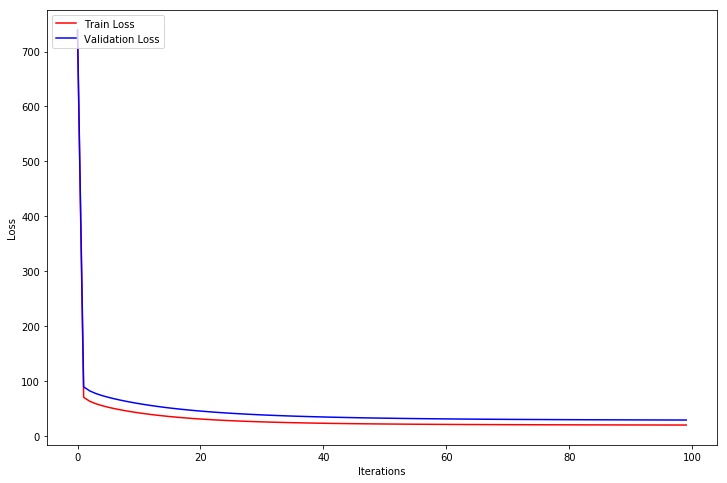

In [7]:
x = np.arange(iters)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, trainLoss.tolist(), 'r', label = 'Train Loss')
ax.plot(x, valiLoss.tolist(), 'b', label = 'Validation Loss')
ax.legend(loc=2)  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Loss')  